# Mask Detection (마스크 착용 여부 인식)
코로나바이러스의 전파경로는 비말과 콧물, 가래 등의 호흡기 분비물로 알려져 있어 마스크 착용이 감염 예방에 매우 중요하다.
건물 출입 시 마스크 착용 여부를 사람이 일일이 눈으로 확인하는 것은 인력과 비용을 발생시킬 수 있으므로 비효율적이다. 마스크 착용 여부를 판별할 수 있는 프로그램을 통해 효율적인 출입 통제를 할 수 있다.

In [ ]:
# colab 런타임 끊김 방지
# F12 눌러서 consolo에 아래 내용 복붙하기
# (주석처리 했으니 'Ctrl'+'/' 눌러서 주석처리 없애서 복붙하기)


# function ClickConnect(){
#     console.log("코랩 연결 끊김 방지"); 
#     document.querySelector("colab-toolbar-button#connect").click() 
# }
# setInterval(ClickConnect, 60 * 1000)

Load file


In [1]:
!git clone https://github.com/ghdrbs0302/Mask_Detection

Cloning into 'Mask_Detection'...
remote: Enumerating objects: 3764, done.
remote: Counting objects: 100% (3764/3764), done.
remote: Compressing objects: 100% (3762/3762), done.
remote: Total 3764 (delta 0), reused 3761 (delta 0), pack-reused 0
Receiving objects: 100% (3764/3764), 143.05 MiB | 33.04 MiB/s, done.


In [2]:
pwd

'/content'

loading images...


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model training...
Epoch 1/20
95/95 [==============================] - 37s 369ms/step - loss: 0.3924 - accuracy: 0.8635 - val_loss: 0.1571 - val_accuracy: 0.9713
Epoch 2/20
95/95 [==============================] - 31s 331ms/step - loss: 0.1472 - accuracy: 0.9670 - val_loss: 0.0902 - val_accuracy: 0.9791
Epoch 3/20
95/95 [==============================] - 33s 351ms/step - loss: 0.0993 - accuracy: 0.9759 - val_loss: 0.0724 - val_accuracy: 0.9752
Epoch 4/20
95/95 [==============================] - 34s 353ms/step - loss: 0.0788 - accuracy: 0.9796 - val_loss: 0.0634 - val_accuracy: 0.9752
Epoch 5/20
95/95 [==============================] - 32s 336ms/step - loss: 0.0628 - accuracy: 0.9819 - val_loss: 0.0555 - val_accuracy: 0.9804
Epoch 6/20
95/95 [==============================] - 32s 340ms/step - loss: 0.0562 - accuracy: 0.9822 - val_loss: 0.0539 - val_accuracy: 0.9791
Epoch 7/20
95/95 [==============================] - 33s 343ms/step - loss: 0.0455 - accuracy: 0.9885 - val_loss: 0.0454 - va

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


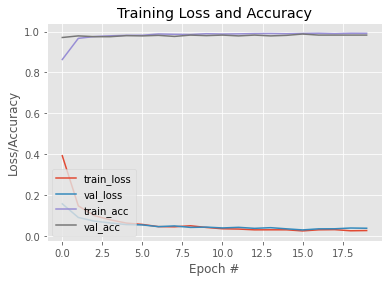

In [4]:
# import the necessary packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D #딥러닝 학습
from tensorflow.keras.layers import Dropout #딥러닝 학습
from tensorflow.keras.layers import Flatten #딥러닝 학습
from tensorflow.keras.layers import Dense #딥러닝 학습
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model #딥러닝 학습
from tensorflow.keras.optimizers import Adam #딥러닝 학습
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer #마스크 착용 유무를 분류하기
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from imutils import paths




INIT_LR = 1e-4 #initial learning rate
EPOCHS = 20 #더 이상 올려도 성능에는 영향이 없음.
BS = 32 #batch_size 줄임말

#colab으로 실행했음.
#colab에서 실행 시에 구글드라이브에 폴더를 올려서 경로 확인 잘하고 실행할 것!
DIRECTORY = r"/content/Mask_Detection/dataset" #실행 시 경로 수정해야함! 
CATEGORIES = ["with_mask", "without_mask"] 

# 데이터셋에 있는 이미지 불러와서 라벨링 해주기.
print("loading images...")
#각각의 이미지 불러오면 data,labels에 지정해두기
data = []
labels = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
    	img_path = os.path.join(path, img)
    	image = load_img(img_path, target_size=(224, 224)) 
    	image = img_to_array(image)
    	image = preprocess_input(image)

    	data.append(image) #각각의 이미지가 들어오면 data에 append로 추가해주기.
    	labels.append(category) #각각의 이미지가 들어오면 labels에 append로 추가해주기


# 마스크 착용 유무를 labels에 one-hot 인코딩 해주기
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

data = np.array(data, dtype="float32") # data에 저장되는 one-hot 인코딩 된 값을 정수로 변환
labels = np.array(labels)

(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42) # 모델링하기 위한 데이터 셋 분리하기

# construct the training image generator for data augmentation
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

# MobileNetV2 network (경량화 네트워크할 때 좋다고 함)
# Fully Connectec Layer (이미지 분류/설명하는 데 가장 적합하게 예측한다고 함)
baseModel = MobileNetV2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))


# base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel) # 결과값은 2개만 나오면 됨  'Mask' or 'Nomask'



model = Model(inputs=baseModel.input, outputs=headModel)


for layer in baseModel.layers:
	layer.trainable = False

# 모델 컴파일
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

# network 학습
print("Model training...")
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

# test 셋 predict 만들기
print("evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)

# test set에서 각 이미지에 해당하는 가장 큰 predict 확률 가진 레이블 찾기
predIdxs = np.argmax(predIdxs, axis=1)

# 잘 분류한 모델 출력
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))


print("saving mask detector model...")
model.save("mask_detector.model", save_format="h5")

# training loss and accuracy 출력
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")